# Predictive Model for Customer Churn

## Step 1: Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


#### Description:
These libraries handle data processing (pandas), visualization (matplotlib, seaborn), and ML modeling (scikit-learn).

## Step 2: Load Dataset

In [3]:

data = pd.read_csv("Telco-Customer-Churn.csv")   # You can download this dataset from Kaggle
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Description:
Loads the dataset into a pandas DataFrame so you can inspect it.
Make sure your .csv file is in the same directory as the notebook.

## Step 3: Explore the Data

In [5]:
# Step 3: Basic information and null values
data.info()
print("------------------------")
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Description:
- info() shows data types and missing values
- describe() gives statistical info
- Check for missing or inconsistent values.

## Step 4: Data Cleaning

In [6]:
# Step 4: Handle missing or inconsistent data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Drop customerID (not useful for prediction)
data.drop('customerID', axis=1, inplace=True)


#### Description:
- Some columns (like TotalCharges) are stored as strings — convert to numeric.
- Also remove identifiers that don’t help prediction.

## Step 5: Encode Categorical Variables

In [7]:
# Step 5: Encode categorical columns
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])


#### Description:
- ML models require numeric inputs.
- We use LabelEncoder to convert text columns (like “Yes”/“No”) into numbers (0/1).

## Step 6: Split Data into Train/Test

In [10]:
# Step 6: Split data
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Description:
- Split dataset into training (80%) and testing (20%) to evaluate model generaliza

## Step 7: Feature Scaling

In [11]:
# Step 7: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Description:
- Scaling helps models like Logistic Regression converge faster and perform better.

## Step 8: Model Training (Logistic Regression)

In [12]:
# Step 8: Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_lr = log_model.predict(X_test)


#### Description:
- Logistic Regression is a great baseline for binary classification problems.

## Step 9: Evaluate Logistic Regression

Logistic Regression Accuracy: 0.815471965933286

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



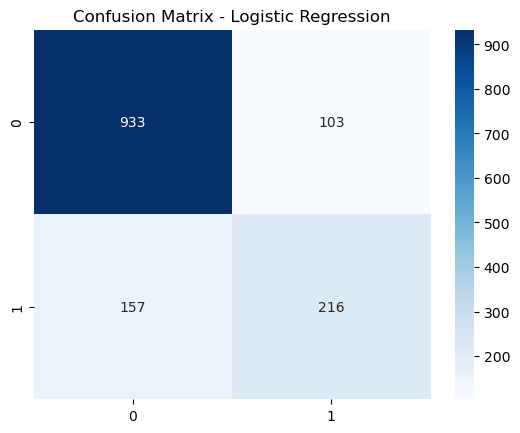

In [13]:
# Step 9: Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


#### Description:
- Shows model accuracy, precision, recall, and F1-score.
- Confusion matrix visualizes how many churned vs non-churned customers were correctly classified.

## Step 10: Train Random Forest (for comparison)

In [15]:
# Step 10: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


#### Description:
- Random Forest usually gives better performance and allows feature importance visualization.

## Step 11: Evaluate Random Forest

Random Forest Accuracy: 0.7984386089425124

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



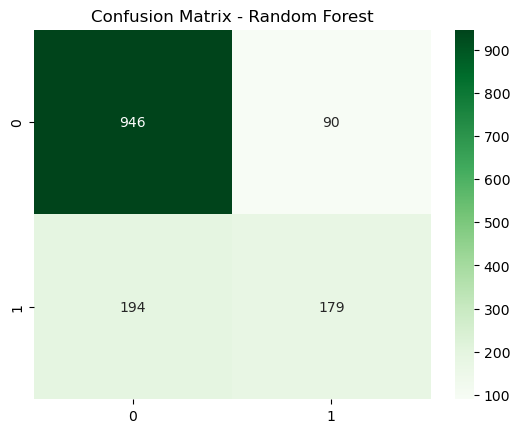

In [16]:
# Step 11: Model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Step 12: Feature Importance Visualization

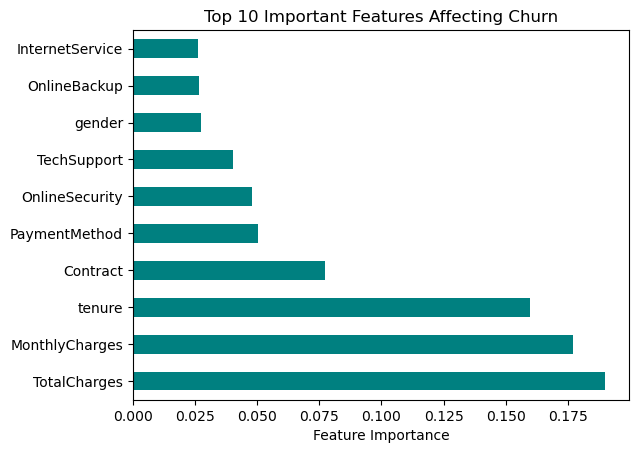

In [17]:
# Step 12: Plot Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features Affecting Churn")
plt.xlabel("Feature Importance")
plt.show()


#### Description:
- Shows which features have the most impact on churn (e.g., contract type, monthly charges, tenure).

## Step 13: ROC-AUC Comparison

In [18]:
# Step 13: ROC-AUC
print("ROC-AUC (Logistic Regression):", roc_auc_score(y_test, y_pred_lr))
print("ROC-AUC (Random Forest):", roc_auc_score(y_test, y_pred_rf))


ROC-AUC (Logistic Regression): 0.7398338112145082
ROC-AUC (Random Forest): 0.6965100872607575


#### Description:
- ROC-AUC shows model performance beyond simple accuracy — higher is better (closer to 1.0).

## Step 14: Final Insights
- Random Forest achieved higher accuracy and AUC than Logistic Regression.

- Features like tenure, MonthlyCharges, and Contract type strongly influence churn.

- Longer contracts and lower monthly charges reduce churn likelihood.